# Exploratory Data Analysis

In this notebook we will explore the dataset, aggregate statistics for fighters and generate ideas for what we would like to include in our dashboard

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Github/UFC_Project/UFC_dataset_clean.csv', index_col=0)
df.head()

,red_fighter,blue_fighter,red_kd,blue_kd,red_ss_pct,blue_ss_pct,red_td_pct,blue_td_pct,red_sub_att,blue_sub_att,red_rev,blue_rev,red_ctrl_time,blue_ctrl_time,result,method,round,time,event_title,weight_class,red_ss_att,red_ss_landed,blue_ss_att,blue_ss_landed,red_ts_att,red_ts_landed,blue_ts_att,blue_ts_landed,red_td_att,red_td_landed,blue_td_att,blue_td_landed,red_head_att,red_head_landed,blue_head_att,blue_head_landed,red_body_att,red_body_landed,blue_body_att,blue_body_landed,red_leg_att,red_leg_landed,blue_leg_att,blue_leg_landed,red_dist_att,red_dist_landed,blue_dist_att,blue_dist_landed,red_clinch_att,red_clinch_landed,blue_clinch_att,blue_clinch_landed,red_grnd_att,red_grnd_landed,blue_grnd_att,blue_grnd_landed,fight_time,early_finish,title_bout,date,location
0,Jack Hermansson,Sean Strickland,0,0,0.38,0.46,0.00,0.00,0,0,0,0,0.516667,0.000000,Sean Strickland,Decision - Split,5,5.000000,UFC Fight Night: Hermansson vs. Strickland,Middleweight,353,137,330,153,353,137,338,161,8,0,0,0,194,22,286,125,105,64,40,24,54,51,4,4,350,134,328,151,3,3,2,2,0,0,0,0,25.000000,0,0,05-2022-02,"Las Vegas, Nevada, USA"
1,Punahele Soriano,Nick Maximov,0,0,0.71,0.64,0.00,0.68,0,1,0,1,1.616667,8.750000,Nick Maximov,Decision - Split,3,5.000000,UFC Fight Night: Hermansson vs. Strickland,Middleweight,63,45,45,29,93,74,82,60,0,0,16,11,46,28,33,19,17,17,8,6,0,0,4,4,38,20,31,15,2,2,10,10,23,23,4,4,15.000000,0,0,05-2022-02,"Las Vegas, Nevada, USA"
2,Shavkat Rakhmonov,Carlston Harris,1,0,0.46,0.37,0.33,0.00,0,0,0,0,0.866667,0.733333,Shavkat Rakhmonov,KO/TKO,1,4.166667,UFC Fight Night: Hermansson vs. Strickland,Welterweight,28,13,27,10,31,16,35,15,3,1,0,0,25,10,13,3,3,3,10,6,0,0,4,1,20,9,25,8,0,0,2,2,8,4,0,0,4.166667,1,0,05-2022-02,"Las Vegas, Nevada, USA"
3,Sam Alvey,Brendan Allen,0,1,0.42,0.66,0.00,0.00,0,1,0,0,0.116667,0.733333,Brendan Allen,Submission,2,2.166667,UFC Fight Night: Hermansson vs. Strickland,Light Heavyweight,57,24,54,36,57,24,54,36,0,0,1,0,52,20,32,15,3,2,15,14,2,2,7,7,56,24,47,32,1,0,3,2,0,0,4,2,7.166667,1,0,05-2022-02,"Las Vegas, Nevada, USA"
4,Tresean Gore,Bryan Battle,0,0,0.60,0.58,0.66,0.12,1,0,0,0,1.266667,3.333333,Bryan Battle,Decision - Unanimous,3,5.000000,UFC Fight Night: Hermansson vs. Strickland,Middleweight,95,57,193,112,126,86,203,119,3,2,8,1,67,31,117,49,17,15,59,46,11,11,17,17,79,42,185,105,12,11,8,7,4,4,0,0,15.000000,0,0,05-2022-02,"Las Vegas, Nevada, USA"


Isreal Adesanya

In [ ]:
df.columns

Index(['red_fighter', 'blue_fighter', 'red_kd', 'blue_kd', 'red_ss_pct',
       'blue_ss_pct', 'red_td_pct', 'blue_td_pct', 'red_sub_att',
       'blue_sub_att', 'red_rev', 'blue_rev', 'red_ctrl_time',
       'blue_ctrl_time', 'result', 'method', 'round', 'time', 'event_title',
       'weight_class', 'red_ss_att', 'red_ss_landed', 'blue_ss_att',
       'blue_ss_landed', 'red_ts_att', 'red_ts_landed', 'blue_ts_att',
       'blue_ts_landed', 'red_td_att', 'red_td_landed', 'blue_td_att',
       'blue_td_landed', 'red_head_att', 'red_head_landed', 'blue_head_att',
       'blue_head_landed', 'red_body_att', 'red_body_landed', 'blue_body_att',
       'blue_body_landed', 'red_leg_att', 'red_leg_landed', 'blue_leg_att',
       'blue_leg_landed', 'red_dist_att', 'red_dist_landed', 'blue_dist_att',
       'blue_dist_landed', 'red_clinch_att', 'red_clinch_landed',
       'blue_clinch_att', 'blue_clinch_landed', 'red_grnd_att',
       'red_grnd_landed', 'blue_grnd_att', 'blue_grnd_landed', 'fight_

# Developing a class to automate various data processing tasks

Focus Areas:


*   Create dataframes that put us in a position to build an accurate fighter profile
*   Represent fighter data to make comparisons intuitive



Current capabilities


*   Ability to access historical fight data based on given fighter

Features to integrate:


*   Function to aggregate data across UFC career
*   Calculate target areas (leg, body, head) both per fight and for career
*   Create pretty table to visualize historical events (Must be user interpretable)






In [ ]:
# Continue to build class to store individual fighter data

class Fighter_Data():
    ''' 
    Currently extracts each unique fighter in the database and stores individual fighter data
    for each fight, stored in a dataframe. 
    '''
    def __init__(self, df):

        df['date'] = pd.to_datetime(df['date'], format="%d-%Y-%m")
        df = df.set_index(df['date'])

        self.data = df
        self.fighter_list = list(set(list(set(self.data.red_fighter))+list(set(self.data.blue_fighter))))
      

    def get_fight_data(self, name):

        mask = (self.data['red_fighter']==name) | (self.data['blue_fighter']==name)
        columns = ['event_title', 'date', 'location', 'title_bout', 'weight_class', 'result', 'method', 'fight_time', 'round']
        fighter = self.data[mask]

        # Create masks to filter fighter data
        blue_cols = [col for col in self.data.columns if 'blue' in col] + columns + ['red_fighter']
        red_cols = [col for col in self.data.columns if 'red' in col] + columns + ['blue_fighter']

        red_to_none = {col:col.replace('red_', '') for col in red_cols}
        red_to_none['blue_fighter'] = 'opponent'

        blue_to_none = {col:col.replace('blue_', '') for col in blue_cols}
        blue_to_none['red_fighter'] = 'opponent'

        blue_mask = (fighter['blue_fighter']==name) 
        red_mask = (fighter['red_fighter']==name) 

        fighter_blue = fighter.loc[blue_mask, blue_cols].rename(blue_to_none, axis=1)
        fighter_red = fighter.loc[red_mask, red_cols].rename(red_to_none, axis=1)

        self.fighter_df = pd.concat([fighter_blue, fighter_red]).sort_index()

        return self.fighter_df

In [ ]:
UFC = Fighter_Data(df)

In [ ]:
conor = UFC.get_fight_data('Conor McGregor')
dustin = UFC.get_fight_data('Dustin Poirier')
bobby = UFC.get_fight_data('Bobby Green')
charles = UFC.get_fight_data('Charles Oliveira')

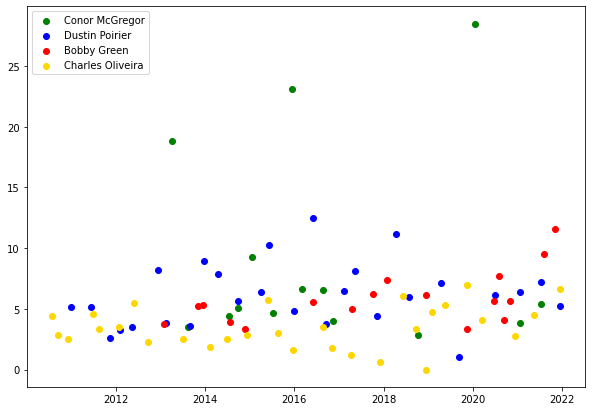

In [ ]:
ss_pm_conor = conor.ss_landed/conor.fight_time
ss_pm_dustin = dustin.ss_landed/dustin.fight_time
ss_pm_bobby = bobby.ss_landed/bobby.fight_time
ss_pm_charles = charles.ss_landed/charles.fight_time

plt.figure(figsize=(10,7))
plt.scatter(conor.index, ss_pm_conor, color='green', label='Conor McGregor')
plt.scatter(dustin.index, ss_pm_dustin, color='blue', label='Dustin Poirier')
plt.scatter(bobby.index, ss_pm_bobby, color='red', label='Bobby Green')
plt.scatter(charles.index, ss_pm_charles, color='gold', label='Charles Oliveira')
plt.legend()
plt.show()


In [ ]:
1/dustin.fight_time

date
2011-01-01    0.066667
2011-06-11    0.066667
2011-11-12    0.153061
2012-02-04    0.295567
2012-05-15    0.062048
2012-12-15    0.235294
2013-02-16    0.066667
2013-08-31    0.066667
2013-12-28    0.204082
2014-04-16    0.175439
2014-09-27    0.566038
2015-04-04    0.266667
2015-06-06    0.379747
2016-01-02    0.066667
2016-06-04    0.346821
2016-09-17    0.631579
2017-02-11    0.066667
2017-05-13    0.110701
2017-11-11    0.082418
2018-04-14    0.064309
2018-07-28    0.110092
2019-04-13    0.040000
2019-09-07    0.082645
2020-06-27    0.040000
2021-01-23    0.132743
2021-07-10    0.200000
2021-12-11    0.090634
Name: fight_time, dtype: float64

In [ ]:
def fighter_data(data, name):

    mask = (data['red_fighter']==name) | (data['blue_fighter']==name)
    fighter = data[mask]

    # Create masks to filter fighter data
    blue_cols = [col for col in data.columns if 'blue' in col] + ['red_fighter']
    red_cols = [col for col in data.columns if 'red' in col] + ['blue_fighter']

    red_to_none = {col:col.replace('red_', '') for col in red_cols}
    red_to_none['blue_fighter'] = 'opponent'
    blue_to_none = {col:col.replace('blue_', '') for col in blue_cols}
    red_to_none['red_fighter'] = 'opponent'

    blue_mask = (fighter['blue_fighter']==name) 
    red_mask = (fighter['red_fighter']==name) 

    fighter_blue = fighter.loc[blue_mask, blue_cols].rename(blue_to_none, axis=1)
    fighter_red = fighter.loc[red_mask, red_cols].rename(red_to_none, axis=1)

    fighter_final = pd.concat([fighter_blue, fighter_red]).sort_index()
    return fighter_final

In [ ]:
conor

,fighter,kd,ss_pct,td_pct,sub_att,rev,ctrl_time,ss_att,ss_landed,ts_att,ts_landed,td_att,td_landed,head_att,head_landed,body_att,body_landed,leg_att,leg_landed,dist_att,dist_landed,clinch_att,clinch_landed,grnd_att,grnd_landed,event_title,date,location,title_bout,weight_class,result,method,fight_time,round
273,Conor McGregor,0,0.71,0.0,1,0,0.000000,38,27,54,43,0,0,21,13,9,6,8,8,26,17,1,1,11,9,UFC 264: Poirier vs. McGregor 3,2021-07-10,"Las Vegas, Nevada, USA",0,Lightweight,Dustin Poirier,TKO - Doctor's Stoppage,5.000000,1
508,Conor McGregor,0,0.43,0.0,0,0,1.116667,66,29,92,52,1,0,60,23,4,4,2,2,63,27,3,2,0,0,UFC 257: Poirier vs. McGregor,2021-01-23,"Abu Dhabi, Abu Dhabi, United Arab Emirates",0,Lightweight,Dustin Poirier,KO/TKO,7.533333,2
988,Conor McGregor,1,0.73,0.0,0,0,0.216667,26,19,27,20,0,0,25,19,1,0,0,0,7,3,3,3,16,13,UFC 246: McGregor vs. Cowboy,2020-01-18,"Las Vegas, Nevada, USA",0,Welterweight,Conor McGregor,KO/TKO,0.666667,1
1639,Conor McGregor,0,0.62,0.0,0,0,0.000000,81,51,128,96,0,0,60,34,19,16,2,1,65,35,10,10,6,6,UFC 229: Khabib vs. McGregor,2018-10-06,"Las Vegas, Nevada, USA",1,Lightweight,Khabib Nurmagomedov,Submission,18.050000,4
2543,Conor McGregor,3,0.38,0.0,0,0,0.883333,84,32,93,40,0,0,71,24,11,7,2,1,67,24,5,3,12,5,UFC 205: Alvarez vs McGregor,2016-11-12,"New York City, New York, USA",1,Lightweight,Conor McGregor,KO/TKO,8.066667,2
2646,Conor McGregor,3,0.57,0.0,0,0,1.516667,286,164,322,197,1,0,212,98,29,26,45,40,253,137,32,27,1,0,UFC 202: Diaz vs. McGregor 2,2016-08-20,"Las Vegas, Nevada, USA",0,Welterweight,Conor McGregor,Decision - Majority,25.000000,5
2851,Conor McGregor,0,0.43,0.0,0,1,0.650000,140,61,145,66,1,0,117,47,11,7,12,7,133,56,4,3,3,2,UFC 196: McGregor vs Diaz,2016-03-05,"Las Vegas, Nevada, USA",0,Welterweight,Nate Diaz,Submission,9.200000,2
2952,Conor McGregor,1,0.83,0.0,0,0,0.033333,6,5,6,5,0,0,4,4,1,0,1,1,4,3,0,0,2,2,UFC 194: Aldo vs McGregor,2015-12-12,"Las Vegas, Nevada, USA",1,Featherweight,Conor McGregor,KO/TKO,0.216667,1
3164,Conor McGregor,1,0.50,0.0,0,0,0.066667,92,46,120,74,0,0,62,31,30,15,0,0,84,39,0,0,8,7,UFC 189: Mendes vs McGregor,2015-07-11,"Las Vegas, Nevada, USA",1,Interim Featherweight,Conor McGregor,KO/TKO,9.950000,2
3389,Conor McGregor,1,0.53,0.0,0,0,0.433333,119,64,120,65,0,0,99,49,16,12,4,3,96,47,14,10,9,7,UFC Fight Night: McGregor vs Siver,2015-01-18,"Boston, Massachusetts, USA",0,Featherweight,Conor McGregor,KO/TKO,6.900000,2


In [ ]:
mask = (df['red_fighter']=='Israel Adesanya') | (df['blue_fighter']=='Israel Adesanya')

izzy = df[mask]

In [ ]:
blue_cols = [col for col in izzy.columns if 'blue' in col]
red_cols = [col for col in izzy.columns if 'red' in col]

red_to_none = {col:col.replace('red_', '') for col in red_cols}
blue_to_none = {col:col.replace('blue_', '') for col in blue_cols}

In [ ]:
blue_mask = (df['blue_fighter']=='Israel Adesanya') 
red_mask = (df['red_fighter']=='Israel Adesanya')

In [ ]:
izzy_blue = izzy.loc[blue_mask, blue_cols]
izzy_red = izzy.loc[red_mask, red_cols]

izzy_blue = izzy_blue.rename(blue_to_none, axis=1)
izzy_red = izzy_red.rename(red_to_none, axis=1)

In [ ]:
pd.concat([izzy_blue, izzy_red]).sort_index()

,fighter,kd,ss_pct,td_pct,sub_att,rev,ctrl_time,ss_att,ss_landed,ts_att,ts_landed,td_att,td_landed,head_att,head_landed,body_att,body_landed,leg_att,leg_landed,dist_att,dist_landed,clinch_att,clinch_landed,grnd_att,grnd_landed
310,Israel Adesanya,0,0.53,0.0,0,2,36,181,96,208,122,0,0,118,44,20,11,43,41,168,85,11,10,2,1
450,Israel Adesanya,0,0.48,0.0,0,0,1,161,78,182,99,0,0,102,32,23,17,36,29,158,77,1,0,2,1
672,Israel Adesanya,1,0.65,0.0,0,0,9,84,55,84,55,0,0,51,24,6,5,27,26,71,45,3,2,10,8
916,Israel Adesanya,0,0.36,0.0,0,0,0,132,48,132,48,0,0,81,14,22,9,29,25,132,48,0,0,0,0
1112,Israel Adesanya,2,0.42,0.0,0,0,4,95,40,95,40,0,0,80,27,8,6,7,7,91,37,0,0,4,3
1379,Israel Adesanya,4,0.45,0.0,2,0,42,237,109,247,119,0,0,186,70,23,16,28,23,225,100,1,1,11,8
1478,Israel Adesanya,0,0.49,0.0,0,0,0,132,65,132,65,0,0,79,27,22,9,31,29,129,63,3,2,0,0
1618,Israel Adesanya,3,0.56,0.0,0,0,10,23,13,25,15,0,0,16,9,4,3,3,1,19,11,3,2,1,0
1765,Israel Adesanya,0,0.55,0.0,1,0,107,215,119,223,127,2,0,144,61,29,21,42,37,192,99,14,12,9,8
1865,Israel Adesanya,0,0.46,0.0,0,0,0,123,57,134,67,1,0,92,31,12,11,19,15,123,57,0,0,0,0
